In [ ]:
%%capture
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
!pip install lifelines
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/base_fccss_igr_curie_011021_update_110123_projet_hsb.csv",
                 sep = ",", low_memory = False)
df.head()

Mounted at /content/drive


,Unnamed: 0.1,Unnamed: 0,personid,num_enq,num_cent,ctr,numcent,cle,ctr2,numcent2,...,iccc_11.f,iccc_12.a,iccc_12.b,iccc_nan,age_at_diagnosis,categ_age_at_diagnosis,other,date_max,date_end,card_age
0,0,0,4141.0,10029085.0,650974,12,650974,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0.0,2016-12-31,2016-12-31,2016-12-31,51.510982
1,1,1,4142.0,10029086.0,671576,12,671576,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1,0.0,2016-12-31,2020-02-19,2020-02-19,52.346044
2,2,2,NaN,10029087.0,680197,12,680197,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2,0.0,2016-12-31,2020-02-19,2020-02-19,52.072253
3,3,3,NaN,10029088.0,681155,12,681155,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1,0.0,2016-12-31,2020-02-19,2020-02-19,51.645140
4,4,4,NaN,10029089.0,681460,12,681460,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,0.0,2016-12-31,2020-02-19,2020-02-19,51.519196


In [ ]:
print(len(df))

7670


# Courbes de survie (KMF)

<Axes: xlabel='timeline'>

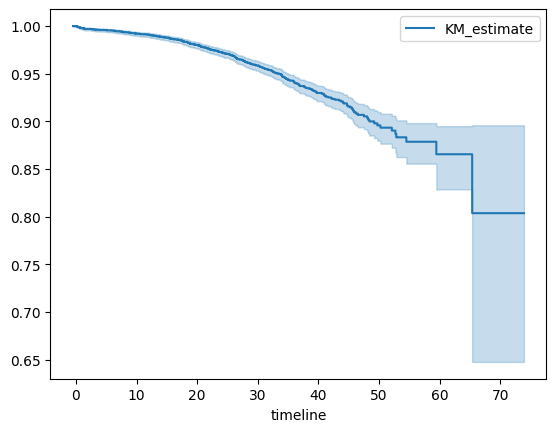

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(df.card_age, event_observed=df.Pathologie_cardiaque_3_new)

kmf.survival_function_
kmf.plot_survival_function()

Analyse de survie en fonction de radiothérapie ou chimiothérapie

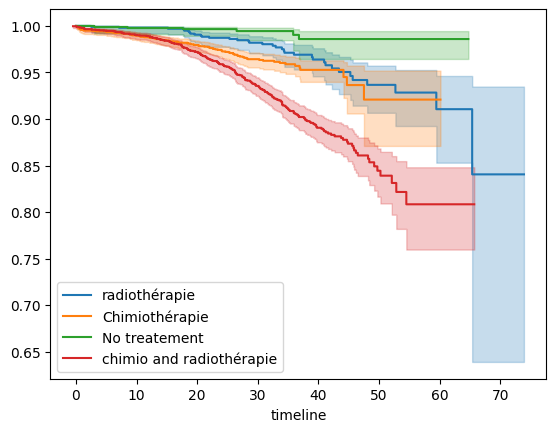

In [ ]:
radio = df.query("radiotherapie_1K == 1 and chimiotherapie == 0")
chimio = df.query("chimiotherapie == 1 and radiotherapie_1K ==0")
no_treat = df.query("radiotherapie_1K == 0 and chimiotherapie ==0")
both_treat = df.query("radiotherapie_1K == 1 and chimiotherapie ==1")

kmf.fit(radio.card_age, radio.Pathologie_cardiaque_3_new, label = "radiothérapie")
ax = kmf.plot_survival_function()

kmf.fit(chimio.card_age, chimio.Pathologie_cardiaque_3_new, label = "Chimiothérapie")
ax = kmf.plot_survival_function()

kmf.fit(no_treat.card_age, no_treat.Pathologie_cardiaque_3_new, label = "No treatement")
ax = kmf.plot_survival_function()

kmf.fit(both_treat.card_age, both_treat.Pathologie_cardiaque_3_new, label = "chimio and radiothérapie")
ax = kmf.plot_survival_function()

Analyse de survie en fonciton des traitemtents 


*   ALKYL
*   ANTHRA

In [ ]:
alkyl = df.query(("do_ALKYL !=0")|("do_ANTHRA !=0"))
kmf.fit(alkyl.card_age, alkyl.Pathologie_cardiaque_3_new, label = "Alkyl")
ax = kmf.plot_survival_function()

no_alkyl = df.query(("do_ANTHRA =0")&("do_ALKYL=0"))
kmf.fit(no_alkyl.card_age, no_alkyl.Pathologie_cardiaque_3_new, label = "No Alkyl")
ax = kmf.plot_survival_function()

TypeError: ignored

Analyse de survie en fonction des 3 cancers les plus fréquents :

*   Nephroblastoma 
*   Neuroblastoma
* Retinoblastoma



In [ ]:
nephro = df.query("iccc_lab == 'Nephroblastoma and other nonepithelial renal tumors' ")
kmf.fit(nephro.card_age, nephro.Pathologie_cardiaque_3_new, label = "Nephroblastoma")
ax = kmf.plot_survival_function()

neuro = df.query("iccc_lab == 'Neuroblastoma and ganglioneuroblastoma' ")
kmf.fit(neuro.card_age, neuro.Pathologie_cardiaque_3_new, label = "Neuroblastoma")
ax = kmf.plot_survival_function()

retino = df.query("iccc_lab == 'Retinoblastoma' ")
kmf.fit(retino.card_age, retino.Pathologie_cardiaque_3_new, label = "Retinoblastoma")
ax = kmf.plot_survival_function()

In [ ]:
df["Siege_groupe"] = df.Siege

abdo = ((df.Siege.str.contains("ABDO", regex=False,na=False, case=False))|
               (df.Siege.str.contains("REIN", regex=False,na=False, case=False))|
               (df.Siege.str.contains("RENAL", regex=False,na=False, case=False))|
               (df.Siege.str.contains("RÉNAL", regex=False,na=False, case=False))|
               (df.Siege.str.contains("SURR", regex=False,na=False, case=False))|
               (df.Siege.str.contains("PANCREAS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("PANCRÉAS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("INTESTIN", regex=False,na=False, case=False))|
               (df.Siege.str.contains("ESTOMAC", regex=False,na=False, case=False))|
               (df.Siege.str.contains("APPENDICE", regex=False,na=False, case=False))|
               (df.Siege.str.contains("LOMBAIRE", regex=False,na=False, case=False))|
               (df.Siege.str.contains("FOIE", regex=False,na=False, case=False)))
df.loc[abdo, "Siege_groupe"] = "ABDOMINAL"


filtre_yeux = ((df.Siege.str.contains("YEUX", regex=False,na=False, case=False))|
               (df.Siege.str.contains("RETINE", regex=False,na=False, case=False))|
               (df.Siege.str.contains("ORBITE", regex=False,na=False, case=False))| 
               (df.Siege.str.contains("CHIASMA", regex=False,na=False, case=False))|
               (df.Siege.str.contains("OPTIQUE", regex=False,na=False, case=False))|
               (df.Siege.str.contains("OEIL", regex=False,na=False, case=False))|
               (df.Siege.str.contains("RÉTINE", regex=False,na=False, case=False)))
df.loc[filtre_yeux, "Siege_groupe"] = "YEUX"

filtre_jambe = ((df.Siege.str.contains("FEMUR", regex=False,na=False, case=False))|
                (df.Siege.str.contains("FÉMUR", regex=False,na=False, case=False))|
                (df.Siege.str.contains("TIBIA", regex=False,na=False, case=False))|
                (df.Siege.str.contains("JAMBE", regex=False,na=False, case=False))|
                (df.Siege.str.contains("TIBIA", regex=False,na=False, case=False))|
                (df.Siege.str.contains("GENOU", regex=False,na=False, case=False))|
                (df.Siege.str.contains("PERON", regex=False,na=False, case=False))|
                (df.Siege.str.contains("PÉRONÉ", regex=False,na=False, case=False))|
                (df.Siege.str.contains("HANCHE", regex=False,na=False, case=False))|
                (df.Siege.str.contains("CHEVILLE", regex=False,na=False, case=False))|
                (df.Siege.str.contains("HANCHE", regex=False,na=False, case=False))|
                (df.Siege.str.contains("FESSE", regex=False,na=False, case=False))|
                (df.Siege.str.contains("PIED", regex=False,na=False, case=False))|
                (df.Siege.str.contains("MOLLET", regex=False,na=False, case=False))|
                (df.Siege.str.contains("CUISSE", regex=False,na=False, case=False)))
df.loc[filtre_jambe, "Siege_groupe"] = "JAMBE"

filtre_thorax = ((df.Siege.str.contains("THORA", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("MEDIASTIN", regex=False,na=False, case=False))|
                  (df.Siege.str.contains("VENTRICUL", regex=False,na=False, case=False))|
                  (df.Siege.str.contains("POUMON", regex=False,na=False, case=False))|
                  (df.Siege.str.contains("PULMON", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("PLEVRE", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("PLÈVRE", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("SEIN", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("GANGLIONS AXILLAIRES  PECTORAUX ET SOUS CLAVICULAIRES", regex=False,na=False, case=False))|
                 (df.Siege.str.contains("MÉDIASTIN", regex=False,na=False, case=False)))
df.loc[filtre_thorax, "Siege_groupe"] = "THORAX"

filtre_bras = ((df.Siege.str.contains("BRAS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("HUMERUS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("HUMÉRUS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("MAIN", regex=False,na=False, case=False))|
               (df.Siege.str.contains("RADIUS", regex=False,na=False, case=False))|
               (df.Siege.str.contains("ÉPAULE", regex=False,na=False, case=False))|
               (df.Siege.str.contains("EPAULE", regex=False,na=False, case=False)))
df.loc[filtre_bras, "Siege_groupe"] = "BRAS"

filtre_cerveau = (df.Siege.str.contains("CERV", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CRANIO", regex=False,na=False, case=False)|
                  df.Siege.str.contains("ENCEPHALE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("ENCÉPHALE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("LOBE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CEREBRAL", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CÉRÉBRAL", regex=False,na=False, case=False)|
                  df.Siege.str.contains("FOSSE POSTERIEURE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("FOSSE POSTÉRIEURE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("THALAMUS", regex=False,na=False, case=False)|
                  df.Siege.str.contains("PINÉAL", regex=False,na=False, case=False)|
                  df.Siege.str.contains("PINEAL", regex=False,na=False, case=False))
df.loc[filtre_cerveau, "Siege_groupe"] = "CERVEAU"

filtre_coccyx = (df.Siege.str.contains("COCCYX", regex=False,na=False, case=False)|
                  df.Siege.str.contains("COCCY", regex=False,na=False, case=False)|
                 df.Siege.str.contains("SACRUM", regex=False,na=False, case=False)|
                  df.Siege.str.contains("BASSIN", regex=False,na=False, case=False)|
                 df.Siege.str.contains("PELVIS", regex=False,na=False, case=False)|
                 df.Siege.str.contains("PELVIEN", regex=False,na=False, case=False)|
                 df.Siege.str.contains("TESTICUL", regex=False,na=False, case=False)|
                 df.Siege.str.contains("OVAIRE", regex=False,na=False, case=False)|
                 df.Siege.str.contains("VAGIN", regex=False,na=False, case=False)|
                 df.Siege.str.contains("PROSTATE", regex=False,na=False, case=False)|
                 df.Siege.str.contains("ANAL", regex=False,na=False, case=False)|
                 df.Siege.str.contains("VULVE", regex=False,na=False, case=False)|
                 df.Siege.str.contains("UTÉRUS", regex=False,na=False, case=False)|
                 df.Siege.str.contains("UTERUS", regex=False,na=False, case=False)|
                 df.Siege.str.contains("PROSTATE", regex=False,na=False, case=False)|
                 df.Siege.str.contains("VESSIE", regex=False,na=False, case=False)|
                 df.Siege.str.contains("URINAIR", regex=False,na=False, case=False))
df.loc[filtre_coccyx, "Siege_groupe"] = "COCCYX"

filtre_nez = (df.Siege.str.contains("PHARYN", regex=False,na=False, case=False)|
                  df.Siege.str.contains("NEZ", regex=False,na=False, case=False)|
                  df.Siege.str.contains("NASAL", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CAVUM", regex=False,na=False, case=False)|
                  df.Siege.str.contains("SUPRA SELLAIRE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("SUPRASELLAIRE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("SINUS", regex=False,na=False, case=False))
df.loc[filtre_nez, "Siege_groupe"] = "NEZ"

filtre_bouche = (df.Siege.str.contains("BOUCHE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("PAROTIDE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("MAXILLAIRE", regex=False,na=False, case=False))
df.loc[filtre_bouche, "Siege_groupe"] = "BOUCHE"

filtre_tete = (df.Siege.str.contains("CHEVELU", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CRANE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("CRÂNE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("PALAIS", regex=False,na=False, case=False)|
               df.Siege.str.contains("OREILLE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("JOUE", regex=False,na=False, case=False))
df.loc[filtre_tete, "Siege_groupe"] = "TETE"

filtre_cou = (df.Siege.str.contains("COU", regex=False,na=False, case=False)|
                  df.Siege.str.contains("AMYGDALE", regex=False,na=False, case=False)|
                  df.Siege.str.contains("THYR", regex=False,na=False, case=False))
df.loc[filtre_cou, "Siege_groupe"] = "COU"

filtre_dos = (df.Siege.str.contains("DOS", regex=False,na=False, case=False)|
              df.Siege.str.contains("COTE", regex=False,na=False, case=False)|
              df.Siege.str.contains("CÔTE", regex=False,na=False, case=False)|
              df.Siege.str.contains("RACHIS", regex=False,na=False, case=False)|
              df.Siege.str.contains("MOËLLE", regex=False,na=False, case=False)|
              df.Siege.str.contains("M?ELLE", regex=False,na=False, case=False)|
              df.Siege.str.contains("MOELLE", regex=False,na=False, case=False))
df.loc[filtre_dos, "Siege_groupe"] = "DOS"

ggl =  (df.Siege.str.contains("GANGLION", regex=False,na=False, case=False)|
              df.Siege.str.contains("GGL", regex=False,na=False, case=False)|
              df.Siege.str.contains("GANGLIUONS", regex=False,na=False, case=False))
df.loc[ggl, "Siege_groupe"] = "GGL"

no_value = df.Siege.isna()
df.loc[no_value, "Siege_groupe"] = "NAN"

px.bar(df.Siege_groupe.value_counts()[:20])

In [ ]:
print(list(df[df.Siege_groupe=='AUTRE'].Siege))

[]


In [ ]:
tete = df[((df.Siege_groupe=="CERVEAU")|(df.Siege_groupe=="YEUX")|(df.Siege_groupe=="NEZ")|(df.Siege_groupe=="BOUCHE")|(df.Siege_groupe=="TETE")|(df.Siege_groupe=="COU"))]
df.loc[tete.index, "Siege_groupe"] = "TETE"
autre = df[((df.Siege_groupe!="TETE")&(df.Siege_groupe!="COCCYX")&(df.Siege_groupe!="JAMBE")&(df.Siege_groupe!="ABDOMINAL")&(df.Siege_groupe!="THORAX")
              &(df.Siege_groupe!="COU")&(df.Siege_groupe!="BRAS")&(df.Siege_groupe!="THORAX")&(df.Siege_groupe!="DOS")&(df.Siege_groupe!="GGL")&(df.Siege_groupe!="NAN"))]
df.loc[autre.index, "Siege_groupe"] = "AUTRE"
px.bar(df.Siege_groupe.value_counts())

0.017


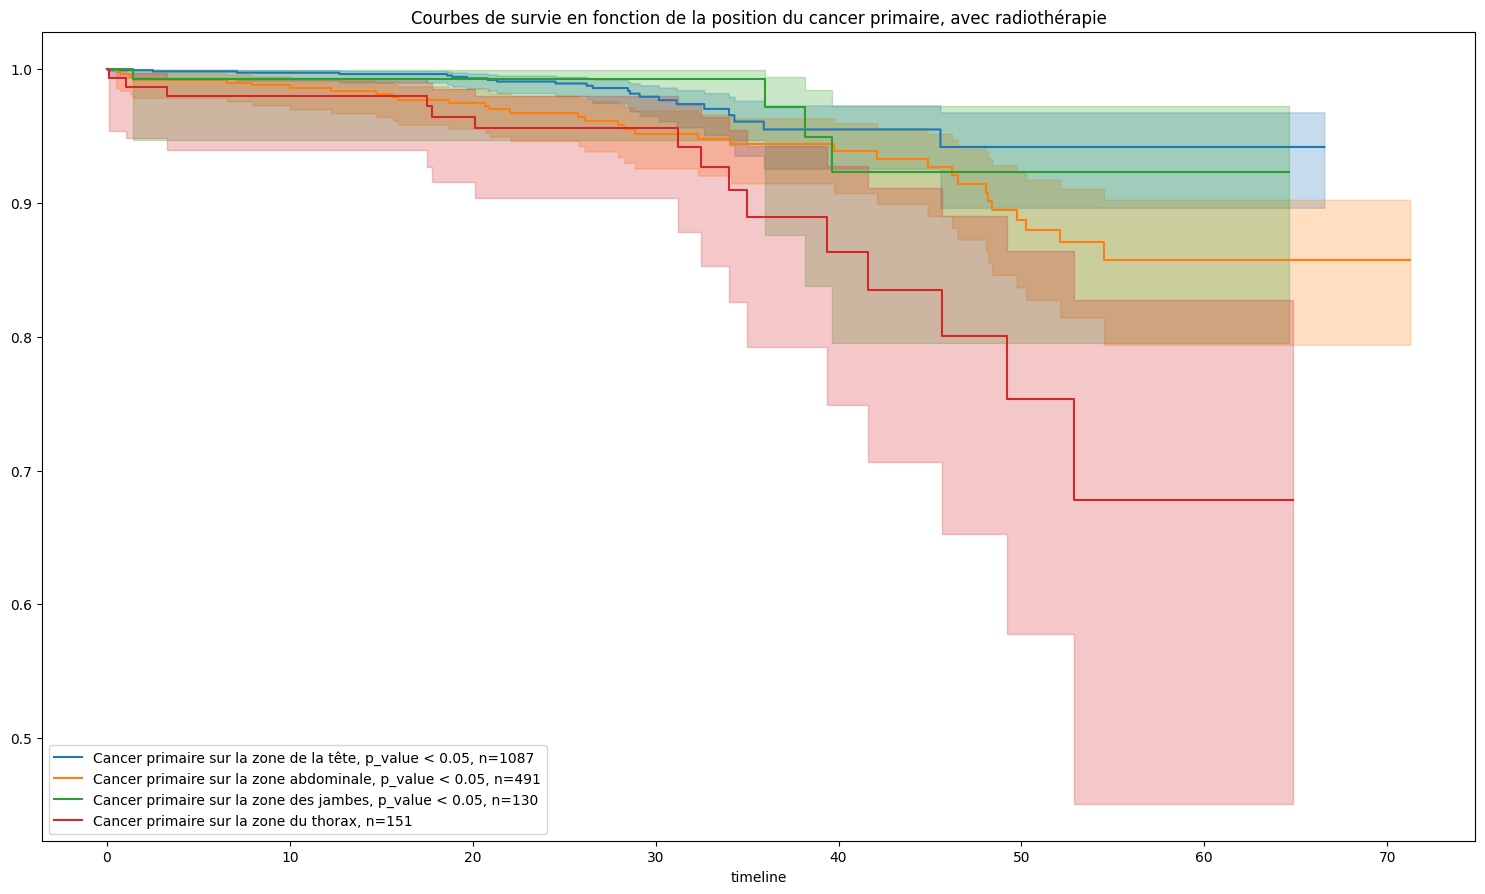

In [ ]:
### DEFINE POPULATION
tete = df[(df.Siege_groupe=="TETE")&(df.radiotherapie_1K==1)]
abdo = df[(df.Siege_groupe=="ABDOMINAL")&(df.radiotherapie_1K==1)]
cocc = df[(df.Siege_groupe=="COCCYX")&(df.radiotherapie_1K==1)]
jambe = df[(df.Siege_groupe=="JAMBE")&(df.radiotherapie_1K==1)]
thorax = df[(df.Siege_groupe=="THORAX")&(df.radiotherapie_1K==1)]
autre = df[(df.Siege_groupe=="AUTRE")&(df.radiotherapie_1K==1)]


### P-values
tete_vs_thorax = round(logrank_test(thorax.card_age, tete.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=tete.Pathologie_cardiaque_3_new).p_value, 5)

abdo_vs_thorax = round(logrank_test(thorax.card_age, abdo.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=abdo.Pathologie_cardiaque_3_new).p_value, 3)

cocc_vs_thorax = round(logrank_test(thorax.card_age, cocc.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=cocc.Pathologie_cardiaque_3_new).p_value, 3)

autre_vs_thorax = round(logrank_test(thorax.card_age, autre.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=autre.Pathologie_cardiaque_3_new).p_value, 3)

jambe_vs_thorax = round(logrank_test(thorax.card_age, jambe.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=jambe.Pathologie_cardiaque_3_new).p_value, 3)
print(jambe_vs_thorax)

### SURVIVAL PLOTS

kmf.fit(tete.card_age, tete.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone de la tête, p_value < 0.05, n={len(tete.index)}")
ax = kmf.plot_survival_function()

kmf.fit(abdo.card_age, abdo.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone abdominale, p_value < 0.05, n={len(abdo.index)}")
ax = kmf.plot_survival_function()

kmf.fit(cocc.card_age, cocc.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone cocc, p_value < 0.05, n={len(cocc.index)}")
#ax = kmf.plot_survival_function()

kmf.fit(autre.card_age, autre.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone autre, p_value < 0.05, n={len(autre.index)}")
#ax = kmf.plot_survival_function()

kmf.fit(jambe.card_age, jambe.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone des jambes, p_value < 0.05, n={len(jambe.index)}")
ax = kmf.plot_survival_function()

kmf.fit(thorax.card_age, thorax.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone du thorax, n={len(thorax.index)}")
ax = kmf.plot_survival_function()

### FINAL PLOT

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc='lower left')
plt.title("Courbes de survie en fonction de la position du cancer primaire, avec radiothérapie")
plt.show()


0.449


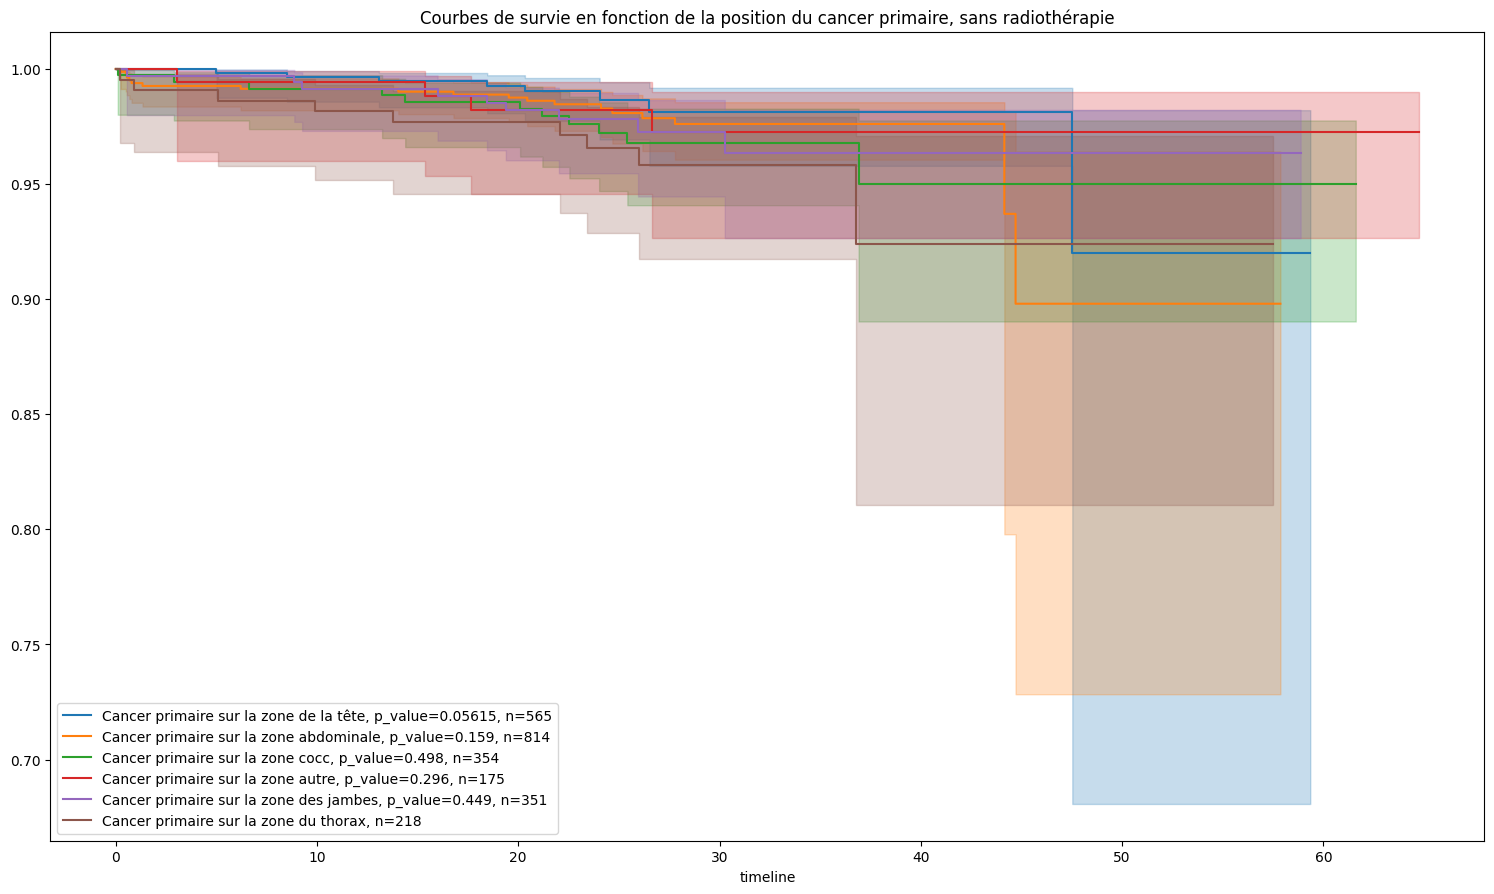

In [ ]:
### DEFINE POPULATION
tete = df[(df.Siege_groupe=="TETE")&(df.radiotherapie_1K==0)]
abdo = df[(df.Siege_groupe=="ABDOMINAL")&(df.radiotherapie_1K==0)]
cocc = df[(df.Siege_groupe=="COCCYX")&(df.radiotherapie_1K==0)]
jambe = df[(df.Siege_groupe=="JAMBE")&(df.radiotherapie_1K==0)]
thorax = df[(df.Siege_groupe=="THORAX")&(df.radiotherapie_1K==0)]
autre = df[(df.Siege_groupe=="AUTRE")&(df.radiotherapie_1K==0)]


### P-values
tete_vs_thorax = round(logrank_test(thorax.card_age, tete.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=tete.Pathologie_cardiaque_3_new).p_value, 5)

abdo_vs_thorax = round(logrank_test(thorax.card_age, abdo.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=abdo.Pathologie_cardiaque_3_new).p_value, 3)

cocc_vs_thorax = round(logrank_test(thorax.card_age, cocc.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=cocc.Pathologie_cardiaque_3_new).p_value, 3)

autre_vs_thorax = round(logrank_test(thorax.card_age, autre.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=autre.Pathologie_cardiaque_3_new).p_value, 3)

jambe_vs_thorax = round(logrank_test(thorax.card_age, jambe.card_age, 
                       event_observed_A=thorax.Pathologie_cardiaque_3_new, 
                       event_observed_B=jambe.Pathologie_cardiaque_3_new).p_value, 3)
print(jambe_vs_thorax)

### SURVIVAL PLOTS

kmf.fit(tete.card_age, tete.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone de la tête, p_value={tete_vs_thorax}, n={len(tete.index)}")
ax = kmf.plot_survival_function()

kmf.fit(abdo.card_age, abdo.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone abdominale, p_value={abdo_vs_thorax}, n={len(abdo.index)}")
ax = kmf.plot_survival_function()

kmf.fit(cocc.card_age, cocc.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone cocc, p_value={cocc_vs_thorax}, n={len(cocc.index)}")
ax = kmf.plot_survival_function()

kmf.fit(autre.card_age, autre.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone autre, p_value={autre_vs_thorax}, n={len(autre.index)}")
ax = kmf.plot_survival_function()

kmf.fit(jambe.card_age, jambe.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone des jambes, p_value={jambe_vs_thorax}, n={len(jambe.index)}")
ax = kmf.plot_survival_function()

kmf.fit(thorax.card_age, thorax.Pathologie_cardiaque_3_new, label = f"Cancer primaire sur la zone du thorax, n={len(thorax.index)}")
ax = kmf.plot_survival_function()

### FINAL PLOT

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc='lower left')
plt.title("Courbes de survie en fonction de la position du cancer primaire, sans radiothérapie")
plt.show()


In [ ]:
df.radiotherapie_1K.mean()

0.5474823897730238

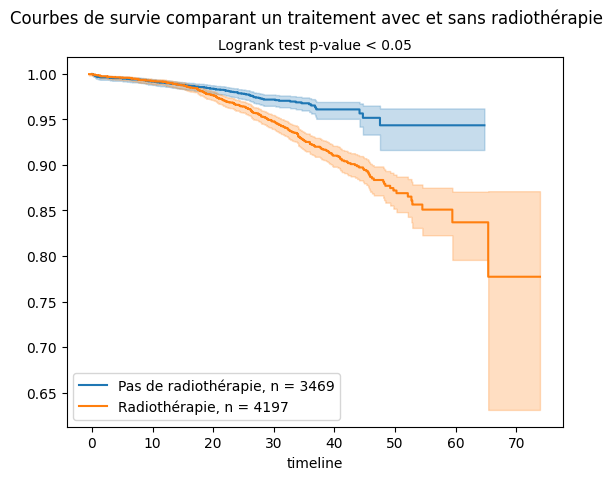

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(df[df.radiotherapie_1K==0].card_age, event_observed=df[df.radiotherapie_1K==0].Pathologie_cardiaque_3_new, label=f'Pas de radiothérapie, n = {len(df[df.radiotherapie_1K==0])}')
ax = kmf.plot_survival_function()

kmf.fit(df[df.radiotherapie_1K==1].card_age, event_observed=df[df.radiotherapie_1K==1].Pathologie_cardiaque_3_new, label=f"Radiothérapie, n = {len(df[df.radiotherapie_1K==1])}")
ax = kmf.plot_survival_function()

logtest = logrank_test(df[df.radiotherapie_1K==0].card_age, df[df.radiotherapie_1K==1].card_age, 
                       event_observed_A=df[df.radiotherapie_1K==0].Pathologie_cardiaque_3_new, 
                       event_observed_B=df[df.radiotherapie_1K==1].Pathologie_cardiaque_3_new)

plt.suptitle(f"Courbes de survie comparant un traitement avec et sans radiothérapie", fontsize=12)
plt.title("Logrank test p-value < 0.05", fontsize=10)
plt.show()


1.0076175758062778e-11


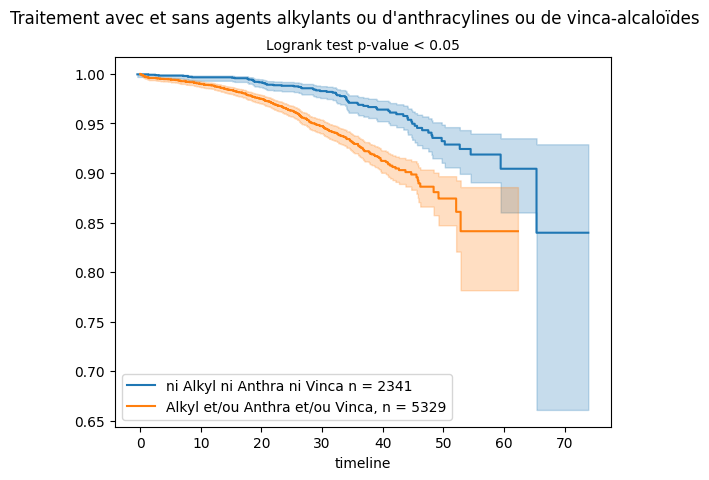

In [ ]:
no_alkyl = df[(df.ALKYL==0)&(df.ANTHRA==0)&(df.VINCA==0)]
kmf.fit(no_alkyl.card_age, event_observed= no_alkyl.Pathologie_cardiaque_3_new, label=f"ni Alkyl ni Anthra ni Vinca n = {len(no_alkyl)}")
ax = kmf.plot_survival_function()

alkyl = df[(df.ALKYL!=0)|(df.ANTHRA!=0)|(df.VINCA!=0)]
kmf.fit(alkyl.card_age, event_observed= alkyl.Pathologie_cardiaque_3_new, label=f"Alkyl et/ou Anthra et/ou Vinca, n = {len(alkyl)}")
ax = kmf.plot_survival_function()

logtest = logrank_test(no_alkyl.card_age, alkyl.card_age, 
                       event_observed_A=no_alkyl.Pathologie_cardiaque_3_new, 
                       event_observed_B=alkyl.Pathologie_cardiaque_3_new)

print(logtest.p_value)
plt.suptitle(f"Traitement avec et sans agents alkylants ou d'anthracylines ou de vinca-alcaloïdes", fontsize=12)
plt.title("Logrank test p-value < 0.05", fontsize=10)
plt.show()
